In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML5.4%20EDA/titanic.csv')

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.shape

(891, 12)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Визуализируем пропуски

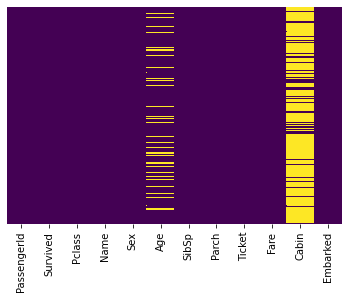

In [31]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis');

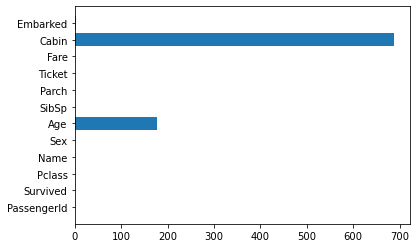

In [32]:
plt.barh(df.columns, df.isna().sum().values, align='center');

В `Cabin` много пропусков, тогда удалим этот признак.

### Визуализация уникальных значений

In [33]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Text(0, 0.5, 'Признаки')

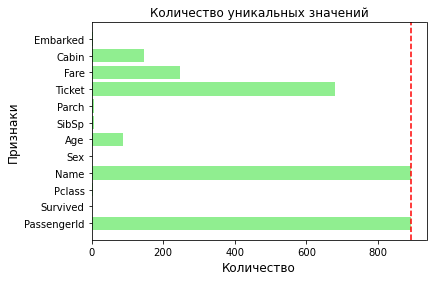

In [34]:
fig = plt.figure()
ax = fig.subplots()
ax.axvline(x=df.shape[0], color='r', linestyle='--');
plt.barh(df.columns, df.nunique(), align='center', color='lightgreen')
plt.title('Количество уникальных значений')
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Признаки', fontsize=12)

Столбцы `PassengerId`, `Ticket` и `Name` следует удалить из-за болььшого количества уникальных значений

In [35]:
df.drop(columns=['PassengerId', 'Ticket', 'Name', 'Cabin'], inplace=True)

In [36]:
df['Age'].sort_values().unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [37]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [38]:
df.dropna(inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


### Визуализируем целевую переменную

C:\Users\dima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

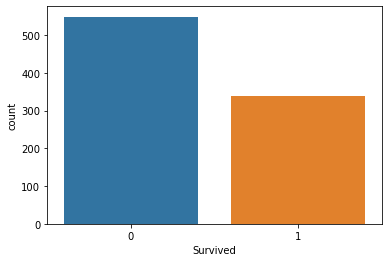

In [41]:
sns.countplot(df['Survived'])

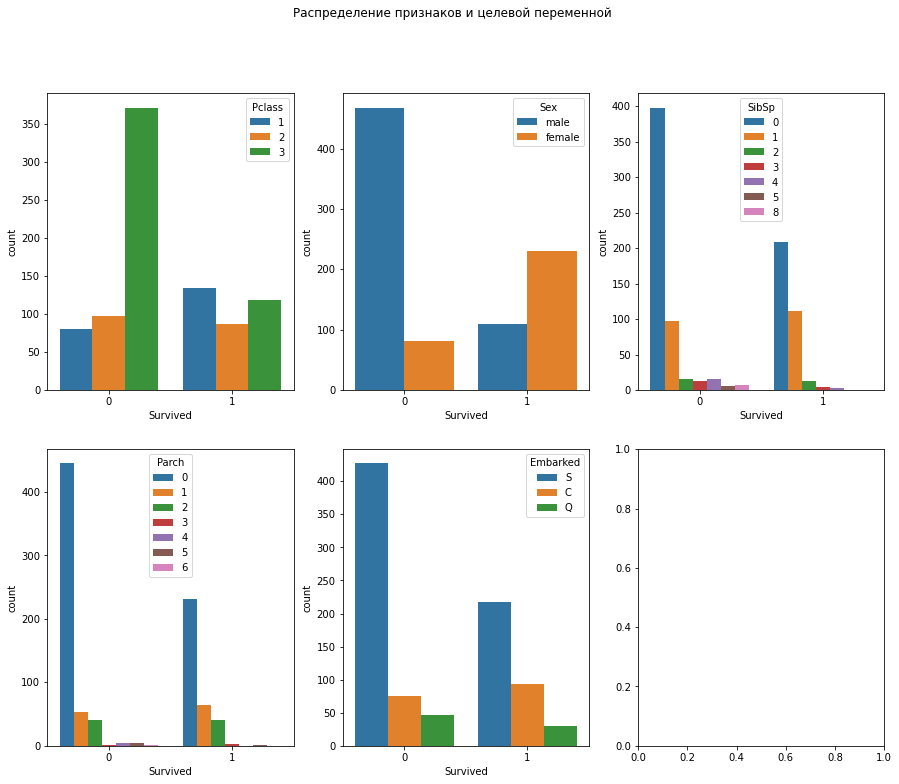

In [42]:
fig, ax = plt.subplots(2, 3, figsize=(15, 12))
axes = ax.ravel()
fig.suptitle('Распределение признаков и целевой переменной')
for i, feat in enumerate(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']):
    sns.countplot(x='Survived', data=df, ax=axes[i], hue=feat)
plt.show()

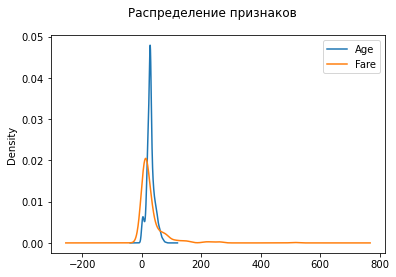

In [47]:
df[['Age', 'Fare']].plot(kind='kde')
plt.suptitle('Распределение признаков');

In [49]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [50]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3.0,22.0,1.0,0.0,7.2500,True,False,True
1,1.0,1.0,38.0,1.0,0.0,71.2833,False,False,False
2,1.0,3.0,26.0,0.0,0.0,7.9250,False,False,True
3,1.0,1.0,35.0,1.0,0.0,53.1000,False,False,True
4,0.0,3.0,35.0,0.0,0.0,8.0500,True,False,True


In [51]:
df_corr = df.corr().abs()

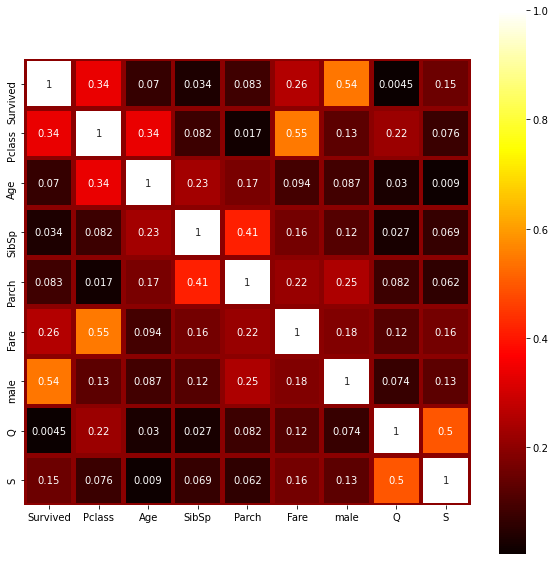

In [58]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(
    df_corr,
    annot=True,
    fmt='.2g',
    cmap='hot',
    linewidth=4,
    linecolor='darkred',
    square=True,
    xticklabels=df_corr.columns,
    yticklabels=df_corr.columns
);

На целевую переменную влияют признаки: `male`, `Pclass` и `Fare`

Уберем один из признаков `Pclass` или `Fare` и `Q` или `S`, так как они наиболее скоррелированы

### PairGrid

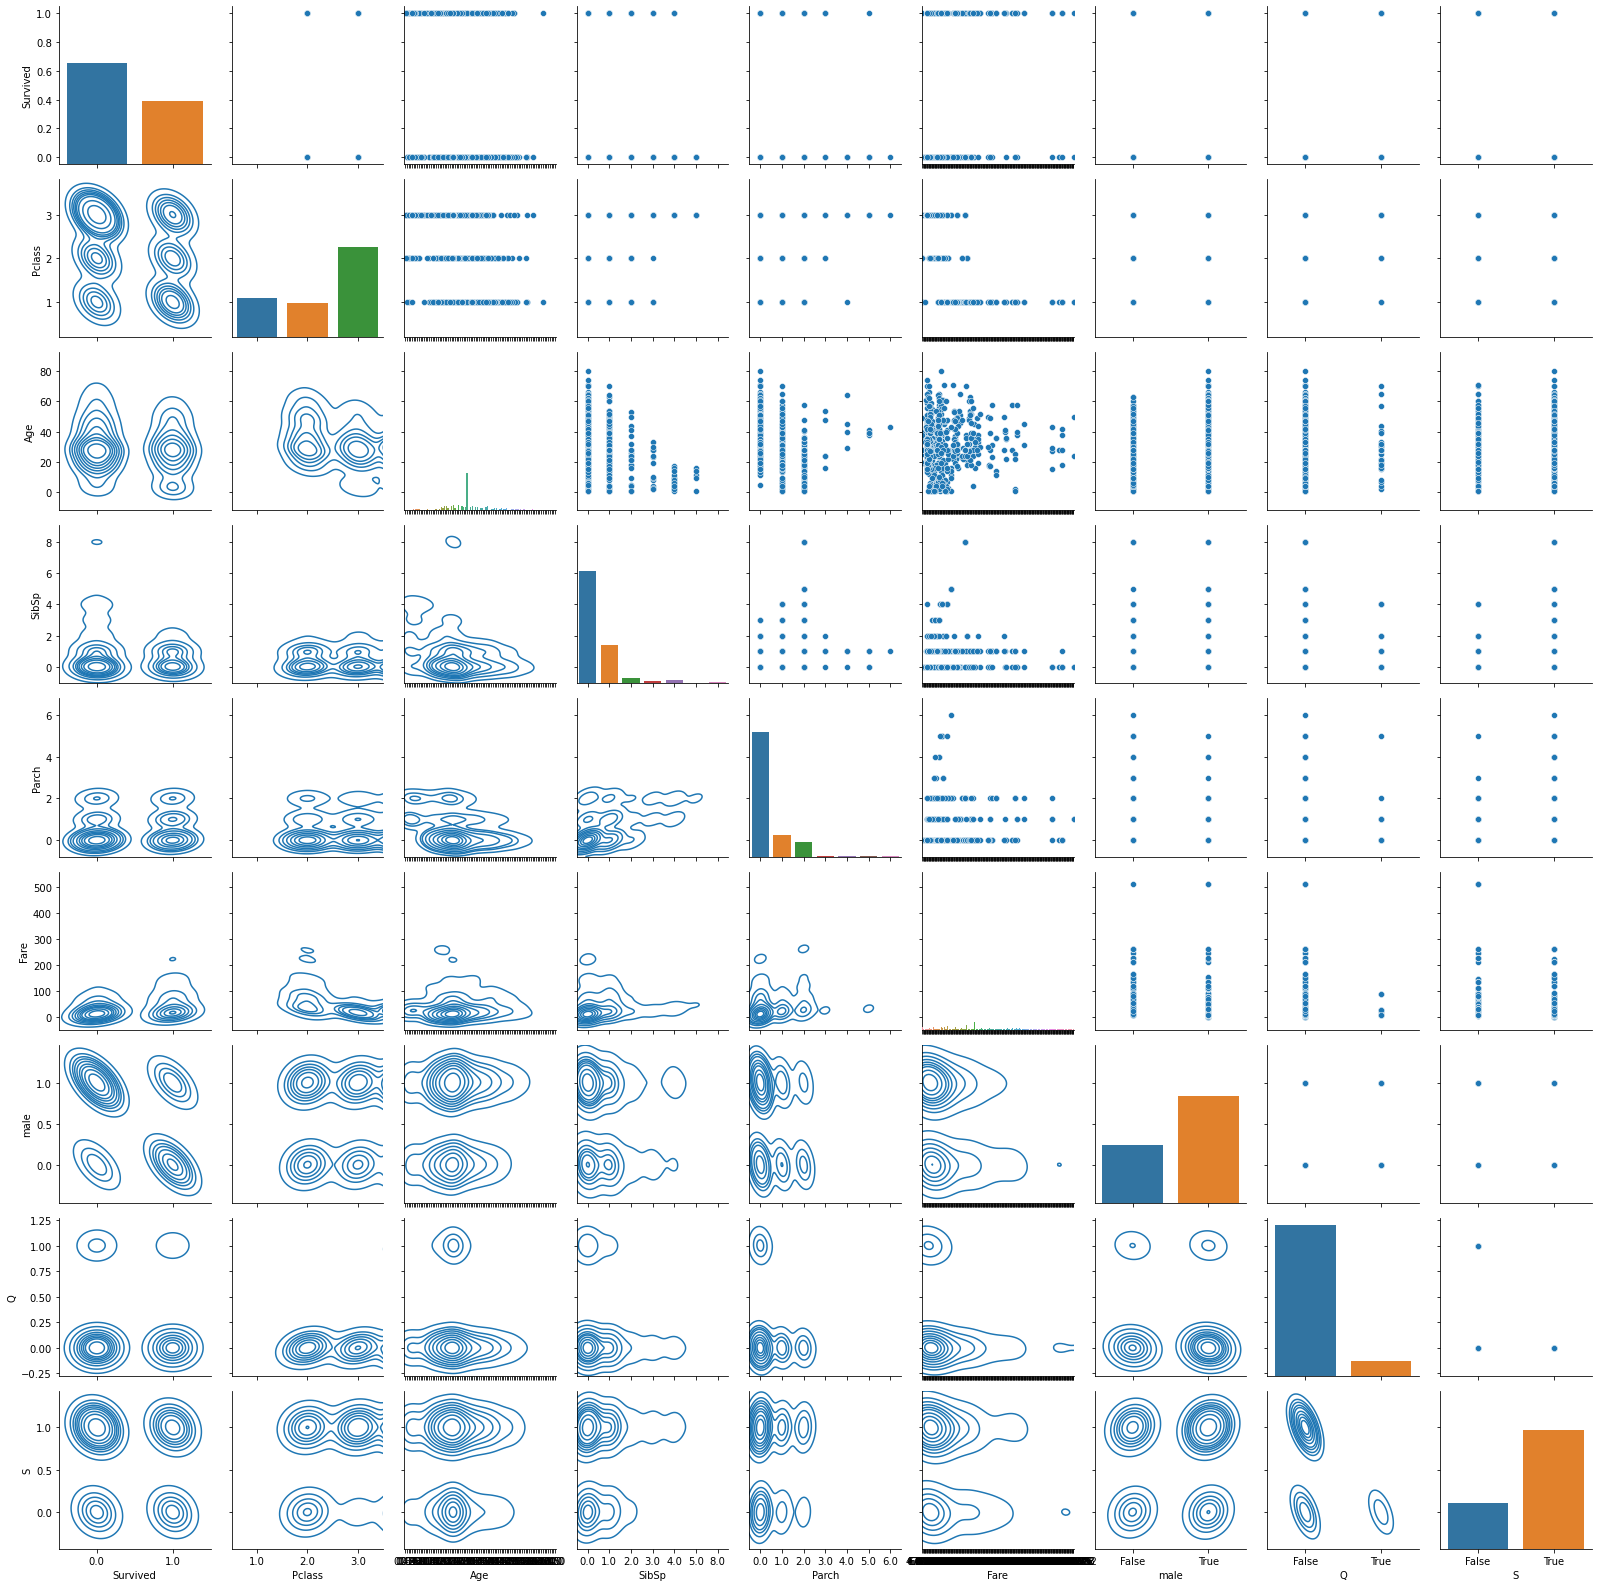

In [61]:
g = sns.PairGrid(df)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.countplot);

### Визуализруем выбросы

С помощью Boxplot